# Activity 1: Selecting a Target Feature and Creating a Target Matrix

In [5]:
import numpy as np

a = np.array([[2,2], [3,2]])

a.mean()

2.25

In [1]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
X = titanic.drop("survived", axis=1)
Y = titanic["survived"]

In [4]:
print(X.shape)
print(Y.shape)

(891, 14)
(891,)


# Data Preprocessing

# Exercise 2: Dealing with Messy Data

In [6]:
age = titanic["age"]
age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [7]:
print(age.shape)
age.isnull().sum()

(891,)


177

In [9]:
mean = age.mean()
mean = mean.round()
mean

30.0

In [11]:
age.fillna(mean, inplace=True)
age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    30.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

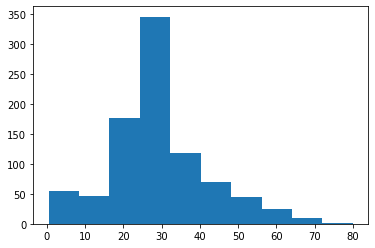

In [12]:
import matplotlib.pyplot as plt
plt.hist(age)
plt.show()

In [14]:
min_val = age.mean() - (3*age.std())
min_val

-9.24882123057397

In [15]:
max_val = age.mean() + (3*age.std())
max_val

68.76659900835175

In [16]:
outliers = age[age > max_val]
outliers.count()

7

In [18]:
outliers

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

In [19]:
age = age[age <= max_val]
age.shape

(884,)

# Exercise 3: Applying Feature Engineering over Text Data

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

em_town = titanic["embark_town"]
em_town.head(10)

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
5     Queenstown
6    Southampton
7    Southampton
8    Southampton
9      Cherbourg
Name: embark_town, dtype: object

In [23]:
enc = LabelEncoder()
new_label = pd.Series(enc.fit_transform(em_town.astype("str")))
new_label.head(10)

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
dtype: int64

# Exercise 4: Normalizing and Standardizing Data

In [24]:
age_normalized = (age - age.min())/(age.max()-age.min())
age_normalized.head(10)

0    0.329064
1    0.573041
2    0.390058
3    0.527295
4    0.527295
5    0.451052
6    0.817017
7    0.024093
8    0.405306
9    0.207075
Name: age, dtype: float64

In [26]:
age_standardized = (age - age.mean())/age.std()
age_standardized.head(10)

0   -0.594548
1    0.687225
2   -0.274105
3    0.446892
4    0.446892
5    0.046338
6    1.968998
7   -2.196765
8   -0.193994
9   -1.235435
Name: age, dtype: float64

In [27]:
print("Mean: " + str(age_standardized.mean()))
print("Standard Deviation: " + str(age_standardized.std()))

Mean: 9.645376503530772e-17
Standard Deviation: 1.0


# Activity 2: Preprocessing an Entire Dataset

In [53]:
X2 = titanic[['sex','age','fare','class','embark_town','alone']]
Y2 = titanic['survived']

In [54]:
print(X2.shape)
print(Y2.shape)

print("\nX Nulls: \n", X2.isnull().sum())
print("\nY Nulls: \n", Y2.isnull().sum())

(891, 6)
(891,)

X Nulls: 
 sex            0
age            0
fare           0
class          0
embark_town    2
alone          0
dtype: int64

Y Nulls: 
 0


In [55]:
meanX = X2.mean()
meaX = meanX.round()
meanX

age      29.758889
fare     32.204208
alone     0.602694
dtype: float64

In [56]:
X2.fillna(meanX, inplace=True)
X2.head(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,sex,age,fare,class,embark_town,alone
0,male,22.0,7.2500,Third,Southampton,False
1,female,38.0,71.2833,First,Cherbourg,False
2,female,26.0,7.9250,Third,Southampton,True
3,female,35.0,53.1000,First,Southampton,False
4,male,35.0,8.0500,Third,Southampton,True
5,male,30.0,8.4583,Third,Queenstown,True
6,male,54.0,51.8625,First,Southampton,True
7,male,2.0,21.0750,Third,Southampton,False
8,female,27.0,11.1333,Third,Southampton,False
9,female,14.0,30.0708,Second,Cherbourg,False


In [57]:
X2["class"] = X2["class"].replace(["First", "Second", "Third"], [1,2, 3])
X2.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sex,age,fare,class,embark_town,alone
0,male,22.0,7.2500,3,Southampton,False
1,female,38.0,71.2833,1,Cherbourg,False
2,female,26.0,7.9250,3,Southampton,True
3,female,35.0,53.1000,1,Southampton,False
4,male,35.0,8.0500,3,Southampton,True
5,male,30.0,8.4583,3,Queenstown,True
6,male,54.0,51.8625,1,Southampton,True
7,male,2.0,21.0750,3,Southampton,False
8,female,27.0,11.1333,3,Southampton,False
9,female,14.0,30.0708,2,Cherbourg,False


In [59]:
X2.normalize()
X2.head(10)

AttributeError: 'DataFrame' object has no attribute 'normalize'

In [64]:
X2["fare"] = (X2["fare"] - X2["fare"].min())/(X2["fare"].max()-X2["fare"].min())
X2["fare"].head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    0.014151
1    0.139136
2    0.015469
3    0.103644
4    0.015713
5    0.016510
6    0.101229
7    0.041136
8    0.021731
9    0.058694
Name: fare, dtype: float64

In [65]:
X2["age"] = (X2["age"] - X2["age"].min())/(X2["age"].max()-X2["age"].min())
X2["age"].head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
5    0.371701
6    0.673285
7    0.019854
8    0.334004
9    0.170646
Name: age, dtype: float64

In [66]:
X2

,sex,age,fare,class,embark_town,alone
0,male,0.271174,0.014151,3,Southampton,False
1,female,0.472229,0.139136,1,Cherbourg,False
2,female,0.321438,0.015469,3,Southampton,True
3,female,0.434531,0.103644,1,Southampton,False
4,male,0.434531,0.015713,3,Southampton,True
...,...,...,...,...,...,...
886,male,0.334004,0.025374,2,Southampton,True
887,female,0.233476,0.058556,1,Southampton,True
888,female,0.371701,0.045771,3,Southampton,False
889,male,0.321438,0.058556,1,Cherbourg,True
